<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Format-the-input-data" data-toc-modified-id="Format-the-input-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Format the input data</a></span></li><li><span><a href="#Normalize-the-input-data" data-toc-modified-id="Normalize-the-input-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Normalize the input data</a></span></li><li><span><a href="#Format-the-output-data(labels)" data-toc-modified-id="Format-the-output-data(labels)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format the output data(labels)</a></span></li><li><span><a href="#Set-up-the-mlp-model" data-toc-modified-id="Set-up-the-mlp-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Set up the mlp model</a></span></li><li><span><a href="#Configure-the-model" data-toc-modified-id="Configure-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Configure the model</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Test-different-predictions-on-subplots" data-toc-modified-id="Test-different-predictions-on-subplots-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Test different predictions on subplots</a></span></li></ul></div>

# Image Recognition

**模型训练时提示kernal restarting， 解决方法如下**

In [1]:
from sklearn.model_selection import train_test_split

## Load the data

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test)= mnist.load_data()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
print(type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


## Visualize the data

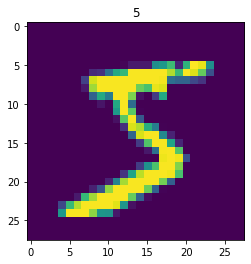

In [4]:
img1= X_train[0]
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(4,4))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

## Format the input data

In [5]:
feature_size = img1.shape[0]*img1.shape[1] # 对二维图像中每个像素进行编号作为一个feature，然后像素的值作为value。

X_train_format = X_train.reshape(X_train.shape[0],feature_size)# (60000,28,28) --> (60000, 784)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)


print(X_train_format.shape)

(60000, 784)


## Normalize the input data

In [6]:
X_train_normal =X_train_format/255
X_test_normal = X_test_format/255
# 像素的值是1-255， 所以要除以255

## Format the output data(labels)

In [7]:
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)

print(y_train[0])
print(y_train_format[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
print(X_train_normal.shape,y_train_format.shape) 

(60000, 784) (60000, 10)


![mlp](images/mlp.png)
**每层神经元的数量是之前的一半。**

## Set up the mlp model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=784, activation='sigmoid', input_dim=feature_size))
mlp.add(Dense(units=392, activation='sigmoid'))
mlp.add(Dense(units=10, activation='softmax'))

mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3930      
Total params: 927,090
Trainable params: 927,090
Non-trainable params: 0
_________________________________________________________________


## Configure the model

In [10]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam')

## Train the model

In [11]:
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 29s 486us/step - loss: 0.3267
Epoch 2/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.1362
Epoch 3/10
60000/60000 [==============================] - 30s 508us/step - loss: 0.0842
Epoch 4/10
60000/60000 [==============================] - 31s 512us/step - loss: 0.0590
Epoch 5/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.0419
Epoch 6/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0307
Epoch 7/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0223
Epoch 8/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0184
Epoch 9/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0123
Epoch 10/10
60000/60000 [==============================] - 32s 540us/step - loss: 0.0121


## Evaluate the model

In [15]:
y_train_predict = mlp.predict_classes(X_train_normal)
print(type(y_train_predict))

<class 'numpy.ndarray'>


In [16]:
print(y_train_predict[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [17]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_train

0.9977166666666667

In [18]:
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9826


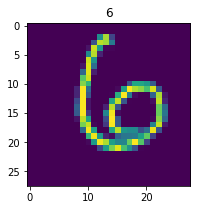

In [16]:
img2 = X_test[100]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[100])
plt.show()

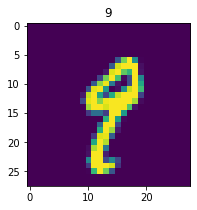

In [19]:
img3 = X_test[78]
fig3 = plt.figure(figsize=(3,3))
plt.imshow(img3)
plt.title(y_test_predict[78])
plt.show()

## Test different predictions on subplots

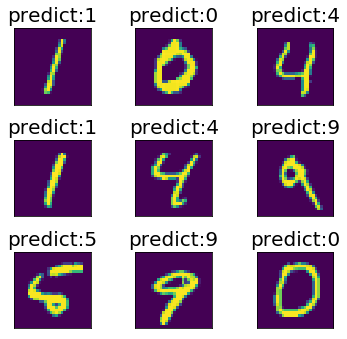

In [29]:
a = [i for i in range(1,10)]
fig4 = plt.figure(figsize=(5,5))
for i in a:
    plt.subplot(3,3,i)
    plt.tight_layout()# 自动调整每个图片之间的间距
    plt.imshow(X_test[i+1])
    plt.title('predict:{}'.format(y_test_predict[i+1]),font2)
    plt.xticks([])
    plt.yticks([])